
**Data-driven prediction of energy use of appliances.The data set is at 10 min 
for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters).**



*date- time year-month-day hour:minute:second

Appliances- energy use in Wh (Dependent variable)

lights- energy use of light fixtures in the house in Wh (Drop this column)

T1 - Temperature in kitchen area, in Celsius

RH1- Humidity in kitchen area, in %

T2- Temperature in living room area, in Celsius 

RH2-Humidity in living room area, in %

T3-Temperature in laundry room area

RH3- Humidity in laundry room area, in %

T4- Temperature in office room, in Celsius 

RH4-Humidity in office room, in %

T5- Temperature in bathroom, in Celsius

RH5-Humidity in bathroom, in % 

T6- Temperature outside the building (north side), in Celsius

RH6 -Humidity outside the building (north side), in %

T7-Temperature in ironing room , in Celsius

RH7-Humidity in ironing room, in % 

T8- Temperature in teenager room 2, in Celsius 

RH8-Humidity in teenager room 2, in %

T9-Temperature in parents room, in Celsius

RH9-Humidity in parents room, in % 

Tout -Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg 

RHout-Humidity outside (from
Chievres weather station), in %

Wind speed-(from Chievres weather station), in m/s

Visibility-(from Chievres weather station), in km

Tdewpoint-(from Chievres weather station), Â°C

rv1- Random variable 1, nondimensional

rv2- Random variable 2, nondimensional*



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew

In [3]:
df=pd.read_csv(r'/content/drive/Othercomputers/My Laptop/JB_Files/Data-CSV/energydata_complete.csv')

In [4]:
df.shape

(19735, 29)

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


#### Feature ranges
1. Temperature : -6 to 30 deg
2. Humidity : 1 to 100 %
3. Windspeed : 0 to 14 m/s
4. Visibility : 1 to 66 km
5. Pressure : 729 to 772 mm Hg
6. Appliance Energy Usage : 10 to 1080 Wh

In [8]:
# Converting date into datetime data type.
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Extracting month,weekday, hour from date
df['month'] = df.date.dt.month
df['weekday'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour

In [10]:
df.drop('date',axis = True, inplace = True)

#EXPLORATORY DATA ANALYSIS

In [11]:
#log transformation of target variable
df['log_appliances'] = np.log(df.Appliances)

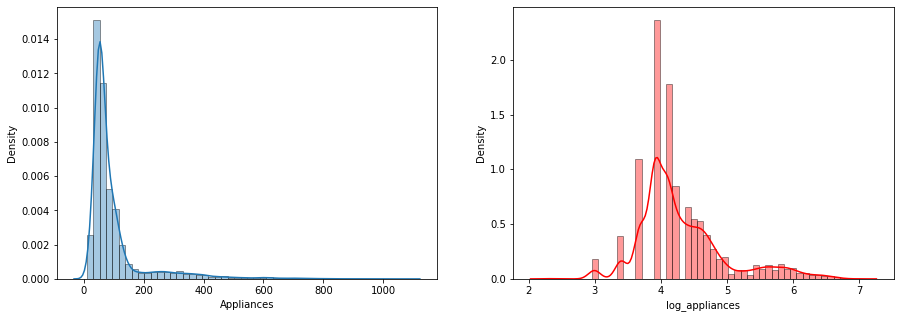

In [12]:
# Distribution plot of 'Appliances' and log transformed 'Appliances' variable.
fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.distplot(df['Appliances'],hist = True,hist_kws={'edgecolor':'black'},ax = axes[0])
sns.distplot(df['log_appliances'],hist = True,color = 'red', hist_kws={'edgecolor':'black'},ax = axes[1]);

From the first plot we observed that "Appliances" is positively skewed. So we used log transformation to remove the skewness. And on removal of skewness it is obseved that it follows normal distribution.

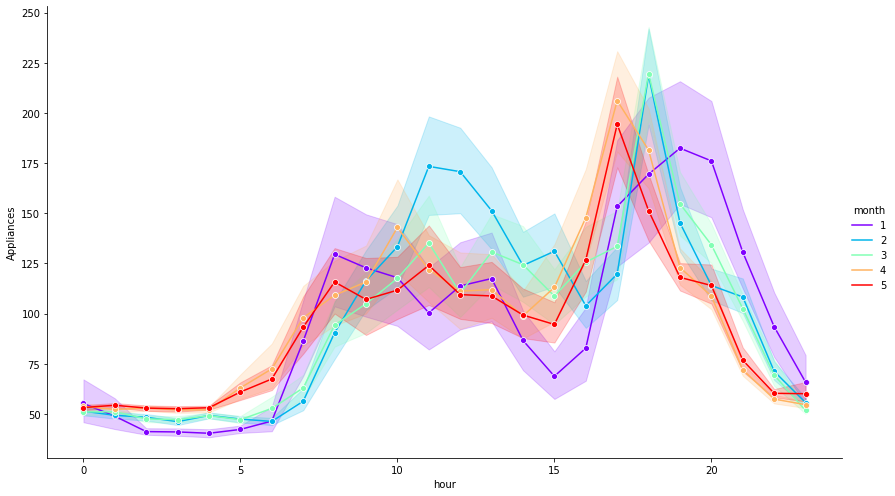

In [13]:
# Monthly Analyis of energy consumption on hourly basis
sns.relplot(y='Appliances', x='hour', data=df, kind='line', hue='month', height=7, aspect=1.7,palette = 'rainbow',marker = 'o')
plt.show()

The dataset has observations from January to May, 2016. For all the months, the energy consumption of the appliances was at its peak for 17:00 to 19:00 hours.
Energy consumption is highest for February and March while January has the lowest.

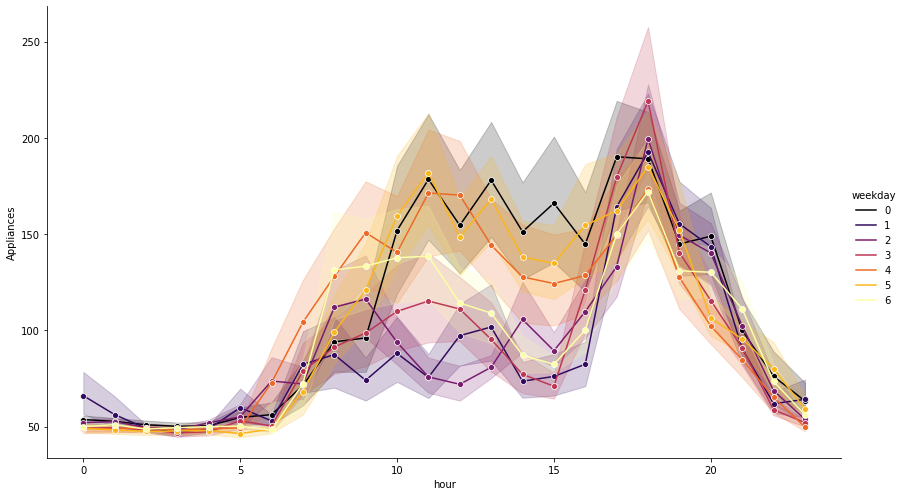

In [14]:
# lineplots for weekly analysis of energy consumption on hourly basis
sns.relplot(y='Appliances', x='hour', data=df, kind='line', hue='weekday', height=7, aspect=1.7, marker = 'o', palette='inferno')
plt.show()

The energy consumption for each day of the week is at its highest during hours between 4 pm to 8 pm while it is at its lowest between 12 am to 5 am . For other times of the day it doesn’t follow a general trend, it differs from day to day.


In [15]:
df['Temperature_total'] = df['T1'] + df['T2'] + df['T3'] + df['T4'] + df['T5'] + df['T6'] + df['T7'] + df['T8'] + df['T9']+df['T_out']
df['Humidity_total'] = df['RH_1'] + df['RH_2'] + df['RH_3'] + df['RH_4'] + df['RH_5'] + df['RH_6'] + df['RH_7'] + df['RH_8'] + df['RH_9']+df['RH_out']
df['log_appliances'] = np.log10(df.Appliances)
aa=df.groupby('month')[('Temperature_total','Humidity_total','Appliances')].mean()
aa

,Temperature_total,Humidity_total,Appliances
month,,,
1,156.294533,533.041913,97.026010
2,169.502877,505.903780,100.945881
3,173.496385,447.199099,96.953405
4,188.422765,430.001035,98.888889
5,216.908728,424.501057,94.199325


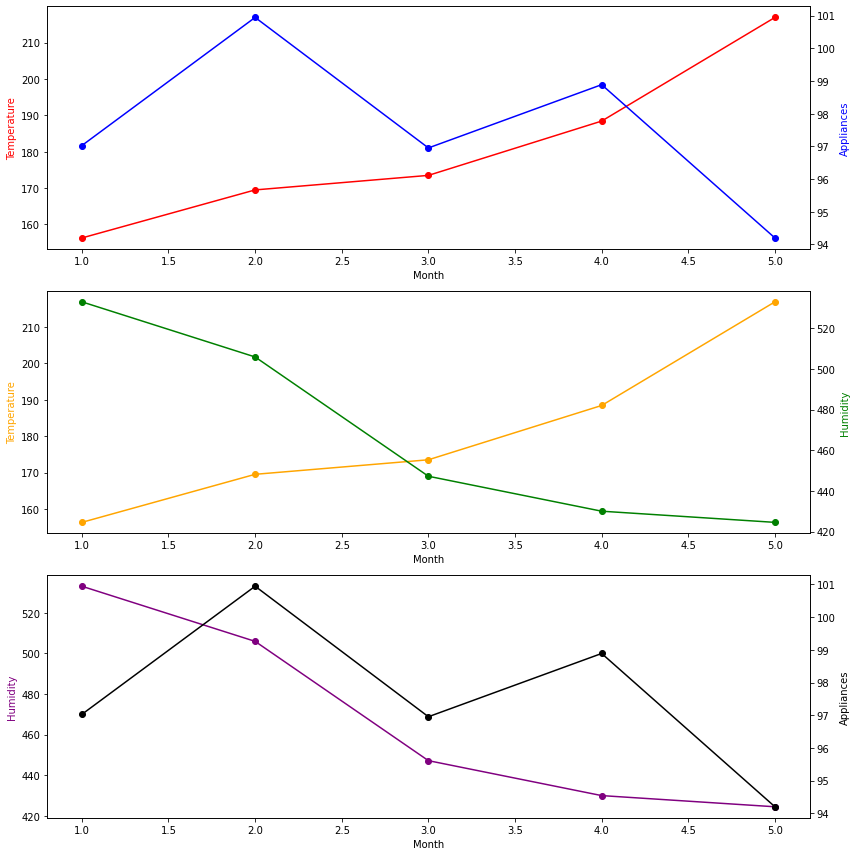

In [16]:
# Multivariate Analysis of variables using lineplots
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True

ax0 = plt.subplot(311)
ax1 = ax0.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax2 = plt.subplot(312)
ax3 = ax2.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax4 = plt.subplot(313)
ax5 = ax4.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax0.get_shared_x_axes().join(ax0, ax1)
ax2.get_shared_x_axes().join(ax2, ax3)
ax4.get_shared_x_axes().join(ax4, ax5)
ax0.set_xlabel('Month',color='Black')
ax2.set_xlabel('Month',color='Black')
ax4.set_xlabel('Month',color='Black')
c1, = ax0.plot(aa.index ,aa.Temperature_total, color="red", marker="o")
ax0.set_ylabel('Temperature',color='Red')
c2, = ax1.plot(aa.index,aa.Appliances,color="blue",marker="o")
ax1.set_ylabel('Appliances',color="blue")
c3, = ax2.plot(aa.index ,aa.Temperature_total, color="orange", marker="o",label='Temperature')
ax2.set_ylabel('Temperature',color="orange")
c4, = ax3.plot(aa.index,aa.Humidity_total,color="green",marker="o",label='Humidity')
ax3.set_ylabel('Humidity',color="green")
c5, = ax4.plot(aa.index,aa.Humidity_total,color="purple",marker="o")
ax4.set_ylabel('Humidity',color="purple")
c6, = ax5.plot(aa.index,aa.Appliances,color="black",marker="o")
ax5.set_ylabel('Appliances',color="black")
plt.show()

1. As Temperature increases, energy consumption of the Appliances increases from Jan-Feb and March-April. And consumption decreases with increase in temperature for months Feb-March and April-May.
2. Temperature increases and humidity decreses as we move from January to May.
3. As humidity decreases, energy consumption of the Appliances increases from Jan-Feb and March-April. And consumption decreases with decrease in humidity for months Feb-March and April-May

In [17]:
df.drop(['Temperature_total','Humidity_total'],axis =1, inplace = True)

In [18]:
data_ = df.drop(columns = 'log_appliances', axis = 1)
data_.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour'],
      dtype='object')

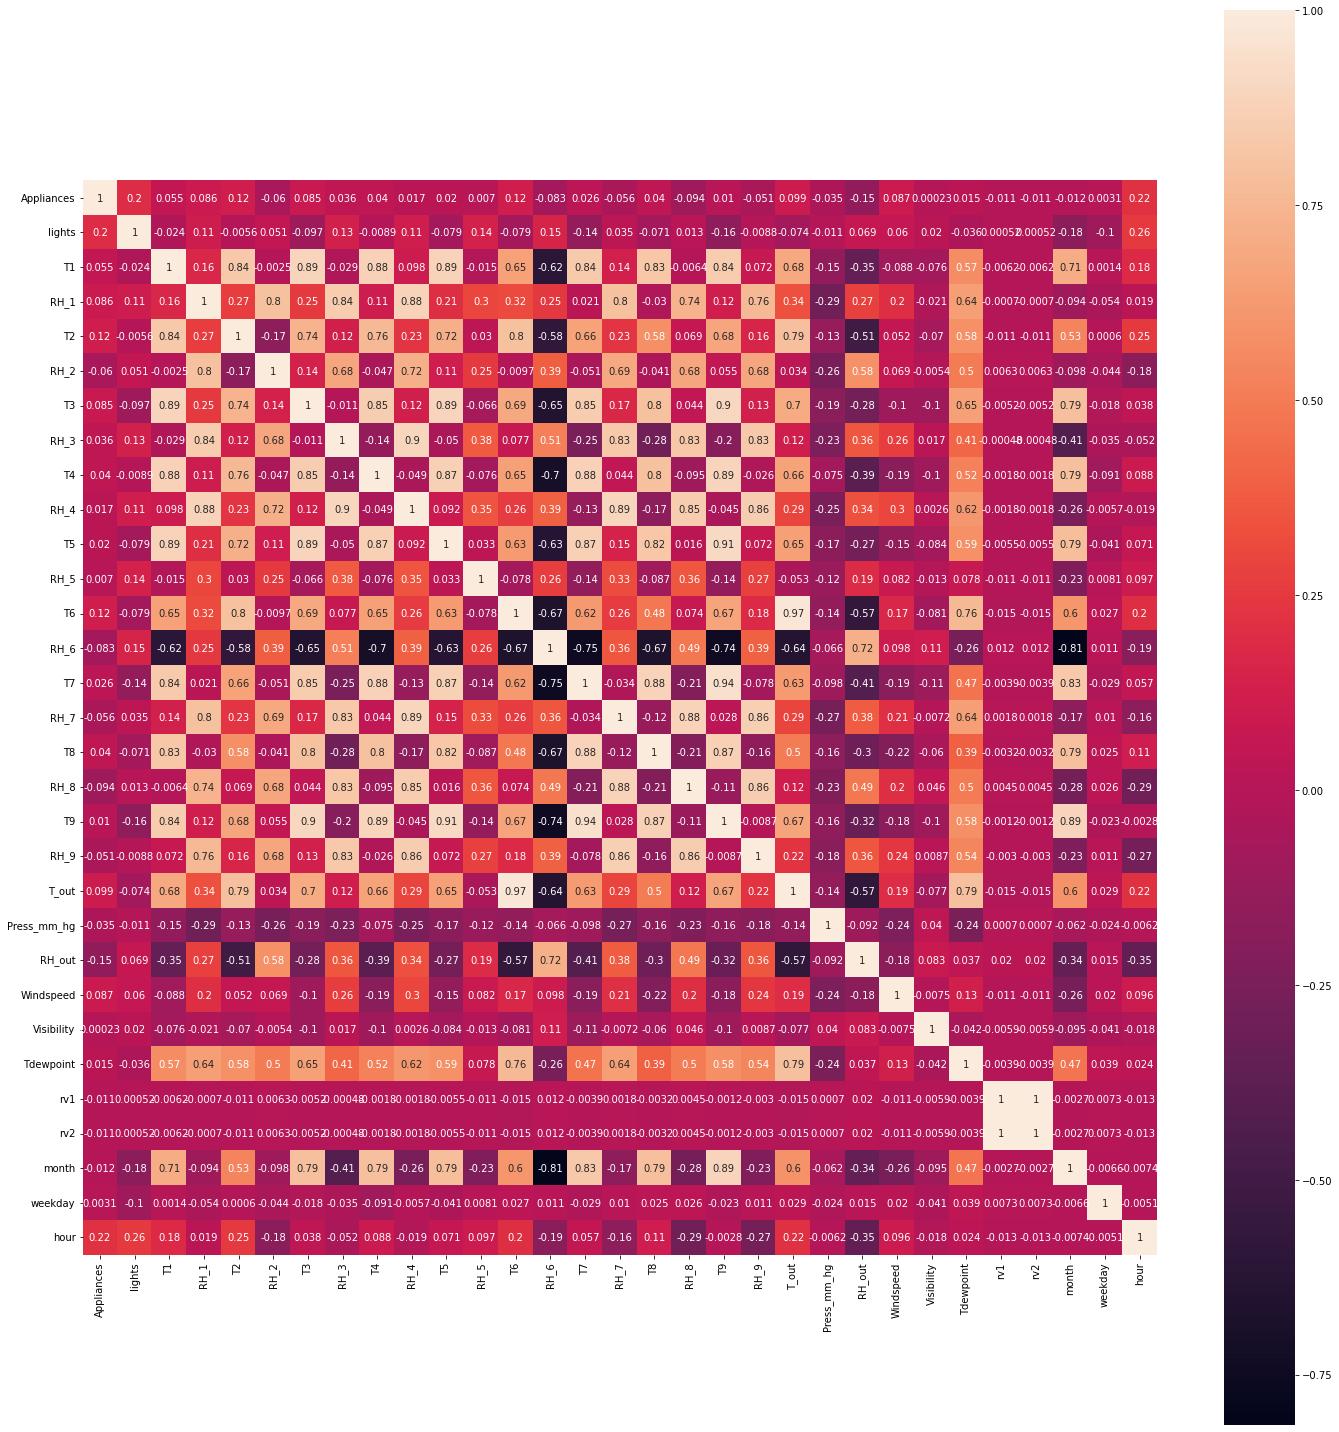

In [19]:
# Heatmap without log transformation on target variable
corr_matrix = data_.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

### Observations based on correlation plot
1. Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.
2. Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values
3. Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.
4. Random variables have no role to play
5. The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

In [20]:
data_log_transformed = df.drop(columns = 'Appliances', axis = 1)

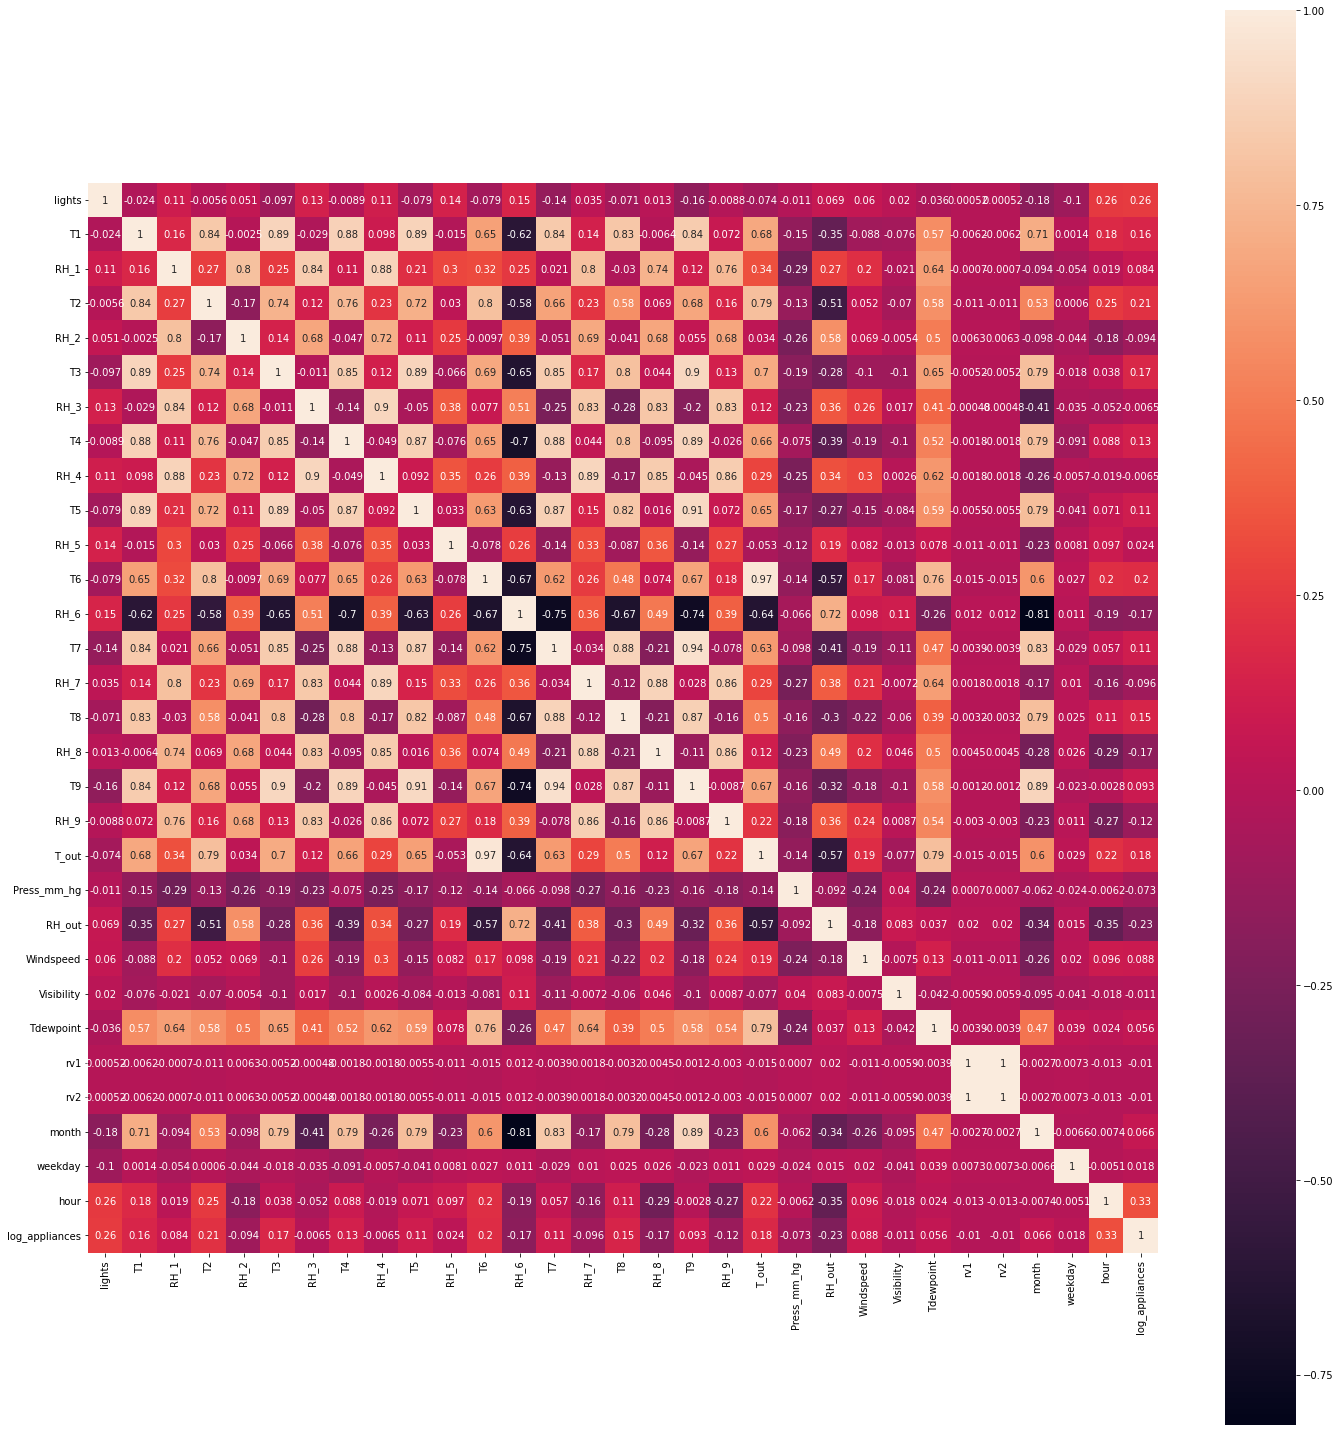

In [21]:
# Heatmap with log transformation on target variable

corr_matrix_transformed = data_log_transformed.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_transformed, annot=True, square=True);

Log Tranformed Appliances column tend to show better correlation with the rest of the features.

# build a prelimenary regression model

In [22]:
#Defining the dependent and independent variables
X = df.drop(['Appliances', 'log_appliances'], axis =1)
y = df['Appliances']

#format data part1 : split the data into dependent and independent data variables

In [23]:
#Splitting into train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [24]:
models = [["Linear",LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegresspr: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()],
             
         ]

In [25]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Percentage Train_R2_Score in %"] = (metrics.r2_score(y_train,curr_model.predict(X_train)))*100
    curr_model_data["Percentage Test_R2_Score in %"] = (metrics.r2_score(y_test,curr_model.predict(X_test)))*100
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    # curr_model_data["adj_r2"] = 1 - ((1 - curr_model_data["adj_r2"]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))    
 
    model_data.append(curr_model_data)

[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
model_data

[{'Name': 'Linear',
  'Train_Time': 0.035390615463256836,
  'Percentage Train_R2_Score in %': 16.897675483441944,
  'Percentage Test_R2_Score in %': 17.07966162493787,
  'Test_RMSE_Score': 91.09288554380794},
 {'Name': 'Lasso: ',
  'Train_Time': 0.14940810203552246,
  'Percentage Train_R2_Score in %': 16.579908676304267,
  'Percentage Test_R2_Score in %': 16.899057106604964,
  'Test_RMSE_Score': 91.19203394686873},
 {'Name': 'Ridge: ',
  'Train_Time': 0.015207290649414062,
  'Percentage Train_R2_Score in %': 16.89767516848487,
  'Percentage Test_R2_Score in %': 17.079817192206683,
  'Test_RMSE_Score': 91.09280009385478},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.08788180351257324,
  'Percentage Train_R2_Score in %': 14.760551087846085,
  'Percentage Test_R2_Score in %': 15.414291605775365,
  'Test_RMSE_Score': 92.00309175004985},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.5711274147033691,
  'Percentage Train_R2_Score in %': 100.0,
  'Percentage Test_R2_Score in %': 20.51

In [27]:
result_df = pd.DataFrame(model_data)
result_df

,Name,Train_Time,Percentage Train_R2_Score in %,Percentage Test_R2_Score in %,Test_RMSE_Score
0,Linear,0.035391,16.897675,17.079662,91.092886
1,Lasso:,0.149408,16.579909,16.899057,91.192034
2,Ridge:,0.015207,16.897675,17.079817,91.092800
3,ElasticNet:,0.087882,14.760551,15.414292,92.003092
4,DecisionTreeRegresson:,0.571127,100.000000,20.511902,89.187703
5,KNeighborsRegressor:,0.002568,51.846312,21.850451,88.433572
6,SVR:,19.720176,-9.882097,-9.494294,104.676615
7,RandomForest,33.826391,93.475528,54.387928,67.560651
8,ExtraTreeRegressor :,9.245691,100.000000,62.315554,61.409420
9,GradientBoostingRegresspr:,9.493248,36.917884,30.483545,83.406085


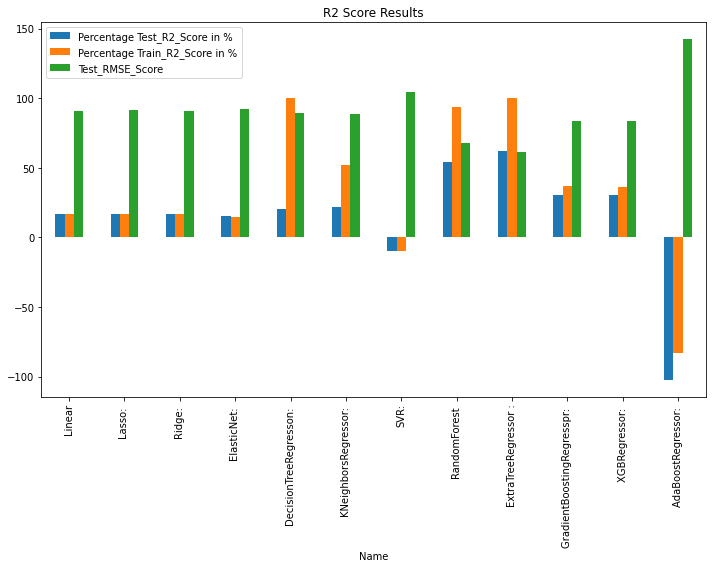

In [28]:
result_df.plot(x="Name", y=['Percentage Test_R2_Score in %' , 'Percentage Train_R2_Score in %' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# hyperparameter tunning for base model

In [30]:
param_grid = [{
               'max_depth': [80, 150, 200,250],
               'n_estimators' : [100,150,200,250],
               'max_features': ["auto", "sqrt", "log2"],
             }]
reg = ExtraTreesRegressor(random_state=40)
# # Instantiate the grid search model
#grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
#grid_search.fit(X_train, y_train)

In [31]:
reg=ExtraTreesRegressor(random_state=40,max_depth=50,max_features='sqrt',n_estimators=250,criterion='friedman_mse')
reg.fit(X_train,y_train)

ExtraTreesRegressor(criterion='friedman_mse', max_depth=50, max_features='sqrt',
                    n_estimators=250, random_state=40)

In [32]:
y_pred = reg.predict(X_test)

In [33]:
#Testing the performance of the model using different evaluation metrics
reg_model_data={}
reg_model_data["Train_R2_Score"] = metrics.r2_score(y_train,reg.predict(X_train))
reg_model_data["Test_R2_Score"] = metrics.r2_score(y_test,reg.predict(X_test))
reg_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,reg.predict(X_test)))
reg_model_data["Mean Absolute Error"]=mean_absolute_error(y_test,y_pred)
reg_model_data["Mean Squared Error"]=mean_squared_error(y_test,y_pred)
#reg_model_data["adj_r2"] = 1 - ((1 - reg_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - 24 - 1))
reg_model_data["RMSLE"]=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
reg_model_data['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
reg_model_data["adj_r2"] = 1 - ((1 - reg_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

In [34]:
reg_model_data

{'Train_R2_Score': 1.0,
 'Test_R2_Score': 0.652827286978326,
 'Test_RMSE_Score': 58.942251098687215,
 'Mean Absolute Error': 27.226065366100837,
 'Mean Squared Error': 3474.188964580694,
 'RMSLE': 4.076558169635645,
 'MAPE': 0.27138123349344856,
 'adj_r2': 0.6501676390236146}

# feature selection trial 1

# BorutaPy


BorutaPy is a popular algorithm for feature selection in sklearn’s SelectFromModel. Basically, we choose a model of convenience — capable of capturing non-linear relationships and interactions, e.g. a random forest — and you fit it on X and y. Then, you extract the importance of each feature from this model and keep only the features that are above a given threshold of importance.


The threshold is determined by competing features with their own completely randomized shadow features. The threshold is defined as the highest feature importance recorded among the shadow features. When the importance of a feature is higher than this threshold, this is called a “hit”. The idea is that a feature is useful only if it’s capable of doing better than the best randomized feature.

In [35]:
print(skew(df['RH_6']),skew(df['RH_out']),skew(df['RH_5']))

-0.24194280929588727 -0.9229270914681814 1.866678124986553


In [36]:
df['log_RH_6'] = np.log(max(df['RH_6']+1) - df['RH_6'])

In [37]:
df['log_RH_5'] = np.log(df.RH_5)

In [38]:
df['log_RH_out'] = np.log(max(df['RH_out']+1) - df['RH_out'])

In [39]:
df['log_T2'] = np.log(df.T2)

In [40]:
#Installing Boruta
!pip install Boruta
from boruta import BorutaPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [41]:
#Dataset for feature selection iterative process
data = df.copy()
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,log_appliances,log_RH_6,log_RH_5,log_RH_out,log_T2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,1.778151,2.812010,4.010963,2.197225,2.954910
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,1.778151,2.823559,4.010963,2.197225,2.954910
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,1.698970,2.876010,4.008968,2.197225,2.954910
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,1.698970,2.860867,4.008968,2.197225,2.954910
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,1.778151,2.773005,4.008968,2.197225,2.954910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,2.000000,4.604170,3.958907,3.814043,3.253857
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,1.954243,4.604170,3.957506,3.806662,3.248590
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,2.431364,4.604170,3.956359,3.799228,3.243708
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,5,4,17,2.623249,4.604170,3.955082,3.791737,3.235300


In [60]:
#data.drop('RH_5',axis=1,inplace=True)
#data.drop('RH_6',axis=1,inplace=True)
#data.drop('T2',axis=1,inplace=True)
#data.drop('RH_out',axis=1,inplace=True)
#data.drop('Visibility',axis=1,inplace=True)
#data.drop('Windspeed',axis=1,inplace=True)
#data.drop('T3',axis=1,inplace=True)
#data.drop('Visibility',axis=1,inplace=True)
#data.drop('T1',axis=1,inplace=True)
#data.drop('hour',axis=1,inplace=True)
#data.drop('Appliances',axis=1,inplace=True)
data['log_appliances']=np.log(df['Appliances'])

X = data.drop('Appliances', axis = 1)
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 1) 


In [57]:
#Random Forest Classifier
rf_all_features = RandomForestRegressor(random_state=40, n_estimators=250, max_depth=80,max_features='sqrt')
rf_all_features.fit(X_train, y_train) 
#score
from sklearn.metrics import r2_score
r2_score(y_test, rf_all_features.predict(X_test))

0.5932525325139397

In [61]:
#Initiating Boruta 
rfc = RandomForestRegressor(random_state=40, n_estimators=250, max_depth=80,max_features='sqrt')
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(np.array(X_train), np.array(y_train))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	7
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=80, max_features='sqrt',
                                         n_estimators=8,
                                         random_state=RandomState(MT19937) at 0x7F6A6ABBAC00),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6A6ABBAC00, verbose=2)

In [62]:
# Bortuta feature selction
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 5 3 1 1 1 1 1 1]
No. of significant features:  24


In [63]:
 'rv1','rv2','weekday','month','Visibility','lights','hourly','hour', 'log_RH_6',  'log_RH_5', 'log_RH_out',  'log_T2',

('rv1',
 'rv2',
 'weekday',
 'month',
 'Visibility',
 'lights',
 'hourly',
 'hour',
 'log_RH_6',
 'log_RH_5',
 'log_RH_out',
 'log_T2')

In [64]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking',ascending=False) 

,Feature,Ranking
20,month,5
18,rv1,4
21,weekday,3
19,rv2,2
0,lights,1
1,T1,1
26,log_RH_out,1
25,log_RH_5,1
24,log_RH_6,1
23,log_appliances,1


In [65]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test)) 

rf_boruta = RandomForestRegressor(random_state=40, n_estimators=250, max_depth=80,max_features='sqrt')
rf_boruta.fit(X_important_train, y_train) 

print(r2_score(y_test,rf_boruta.predict(X_important_test)))


0.9616485789076031


After iteratively applying Boruta rv1, rv2, weekday, Visibility and month columns were dropped.


In [69]:
features_to_keep=df[[                    'T1',
                 'RH_1',             'T2',           'RH_2',             'T3',
                 'RH_3',             'T4',           'RH_4',             'T5',
                 'RH_5',             'T6',           'RH_6',             'T7',
                 'RH_7',             'T8',           'RH_8',             'T9',
                 'RH_9',          'T_out',    'Press_mm_hg',         'RH_out',
            'Windspeed',          'Tdewpoint' ]]

In [70]:
features_to_keep.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint'],
      dtype='object')

#Final Trial:Model using log tranformed in Appliances and one hot encoding the features

In [71]:
# Binning of hour column into different buckets
def hourly_basis(hr):
  if 0 <= hr <= 5:
    return 1
  elif 6 <= hr <= 11:
    return 2
  elif 12<= hr <=17:
    return 3
  else:
    return 4

In [72]:
df['hourly'] = df['hour'].apply(hourly_basis)
df['hourly'].value_counts()

3    4938
4    4933
1    4932
2    4932
Name: hourly, dtype: int64

In [96]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['hourly','month','weekday']]).toarray())
# merge with main df on key values
df = df.join(enc_df)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,log_appliances,log_RH_6,log_RH_5,log_RH_out,log_T2,hourly,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,1.778151,2.812010,4.010963,2.197225,2.95491,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,1.778151,2.823559,4.010963,2.197225,2.95491,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,1.698970,2.876010,4.008968,2.197225,2.95491,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,1.698970,2.860867,4.008968,2.197225,2.95491,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,1.778151,2.773005,4.008968,2.197225,2.95491,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

In [74]:
#Defining the dependent and independent variables
X = df.drop(['Appliances', 'log_appliances', 'rv1','rv2','lights','hourly','hour','weekday','month', 'RH_6',  'RH_5', 'RH_out',  'T2','Visibility'], axis =1)
y = df['log_appliances']

* Based on Boruta rv1, rv2, weekday, Visibility and month columns were dropped.
* Lights column was asked to be dropped.
* hot encoded hour data was used so 'hourly' and 'hour' columns were droped and log transformed variables base form  'RH_6',  'RH_5', 'RH_out',  'T2' were dropped.


In [75]:
X.columns

Index(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed',
       'Tdewpoint', 'log_RH_6', 'log_RH_5', 'log_RH_out', 'log_T2'],
      dtype='object')

In [76]:
#Splitting into train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [77]:
# Scale the data
scaler = StandardScaler() 
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

The feature set has data in varying ranges . Temperature(-6 to 30) , Humidity (1–100) , Windspeed (0 to 14), Visibility (1 to 66) Pressure (729–772) and Application Energy Usage(10–1080). Due to different ranges of features, it is possible that some features will dominate the Regression algorithm. To avoid this situation, all features need to be scaled.Thus, the data was scaled to zero mean and unit variance using the StandardScaler class in sklearn.preprocessing module.

In [78]:
models = [["Linear",LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegresspr: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()],
             
         ]

In [79]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_sc,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(np.exp(y_train),np.exp(curr_model.predict(X_train_sc)))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(np.exp(y_test),np.exp(curr_model.predict(X_test_sc)))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(np.exp(y_test),np.exp(curr_model.predict(X_test_sc))))
    curr_model_data["adj_r2"] = 1 - ((1 - curr_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - X_test_sc.shape[1] - 1))    
 
    model_data.append(curr_model_data)

[05:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
model_data

[{'Name': 'Linear',
  'Train_Time': 0.015260457992553711,
  'Train_R2_Score': 0.18700880424095767,
  'Test_R2_Score': 0.19452146877521037,
  'Test_RMSE_Score': 2.0742541620003854,
  'adj_r2': 0.189799060868463},
 {'Name': 'Lasso: ',
  'Train_Time': 0.005599260330200195,
  'Train_R2_Score': -0.0166398966136021,
  'Test_R2_Score': -0.014230157432169044,
  'Test_RMSE_Score': 2.3275726498339573,
  'adj_r2': -0.02017644690984932},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0036902427673339844,
  'Train_R2_Score': 0.18697677417911518,
  'Test_R2_Score': 0.19454254548522154,
  'Test_RMSE_Score': 2.074227023636194,
  'adj_r2': 0.18982026114827533},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.005343914031982422,
  'Train_R2_Score': -0.0166398966136021,
  'Test_R2_Score': -0.014230157432169044,
  'Test_RMSE_Score': 2.3275726498339573,
  'adj_r2': -0.02017644690984932},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.44321346282958984,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.451642177601

In [81]:
result_df = pd.DataFrame(model_data)
result_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,adj_r2
0,Linear,0.015260,0.187009,0.194521,2.074254,0.189799
1,Lasso:,0.005599,-0.016640,-0.014230,2.327573,-0.020176
2,Ridge:,0.003690,0.186977,0.194543,2.074227,0.189820
3,ElasticNet:,0.005344,-0.016640,-0.014230,2.327573,-0.020176
4,DecisionTreeRegresson:,0.443213,1.000000,0.451642,1.711461,0.448427
5,KNeighborsRegressor:,0.000556,0.739768,0.593082,1.474309,0.590696
6,SVR:,10.841048,0.461222,0.423530,1.754783,0.420150
7,RandomForest,29.347503,0.942238,0.670995,1.325673,0.669066
8,ExtraTreeRegressor :,7.393375,1.000000,0.744859,1.167414,0.743363
9,GradientBoostingRegresspr:,6.802005,0.335114,0.290457,1.946814,0.286297


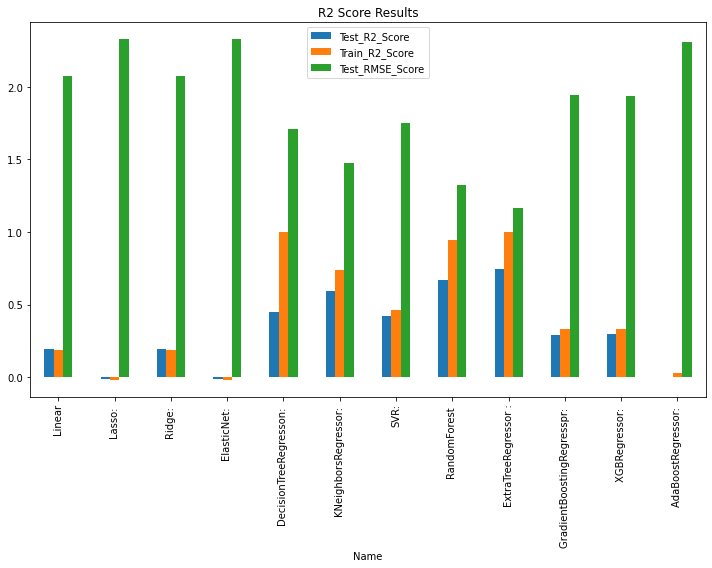

In [82]:
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# hyperparameter tunning for final model

In [83]:

param_grid = [{
              'max_depth': [80, 150, 200,250],
               'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"],
             }]
reg = ExtraTreesRegressor(random_state=40)
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
# grid_search.fit(X_train_sc, y_train)

In [84]:
# grid_search.best_estimator_

In [85]:
reg=ExtraTreesRegressor(random_state=40,max_depth=80,max_features='sqrt',n_estimators=250,criterion='friedman_mse')
reg.fit(X_train_sc,y_train)

ExtraTreesRegressor(criterion='friedman_mse', max_depth=80, max_features='sqrt',
                    n_estimators=250, random_state=40)

In [86]:
y_pred = reg.predict(X_test_sc)

In [87]:
#Testing the performance of the model using different evaluation metrics
reg_model_data={}
reg_model_data["Train_R2_Score"] = metrics.r2_score(np.exp(y_train),np.exp(reg.predict(X_train_sc)))
reg_model_data["Test_R2_Score"] = metrics.r2_score(np.exp(y_test),np.exp(reg.predict(X_test_sc)))
reg_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(np.exp(y_test),np.exp(reg.predict(X_test_sc))))
reg_model_data["Mean Absolute Error"]=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
reg_model_data["Mean Squared Error"]=mean_squared_error(np.exp(y_test),np.exp(y_pred))
reg_model_data["adj_r2"] = 1 - ((1 - reg_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - X_train_sc.shape[1] - 1))
reg_model_data["RMSLE"]=np.log(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
reg_model_data['MAPE'] = mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred))

In [88]:
reg_model_data

{'Train_R2_Score': 1.0,
 'Test_R2_Score': 0.7437464913091469,
 'Test_RMSE_Score': 1.1699569879629987,
 'Mean Absolute Error': 0.6568008457236719,
 'Mean Squared Error': 1.3687993536834526,
 'adj_r2': 0.7422441128488131,
 'RMSLE': 0.15696698570912285,
 'MAPE': 0.08834164420775809}

In [89]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import shap
# package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. 
# The SHAP explanation method computes Shapley values from coalitional game theory. 
# The feature values of a data instance act as players in a coalition. 

In [91]:
X_train

,T1,RH_1,RH_2,T3,RH_3,T4,RH_4,T5,T6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,Windspeed,Tdewpoint,log_RH_6,log_RH_5,log_RH_out,log_T2
2133,19.890000,45.50,45.090000,20.390000,44.290000,19.10,46.700000,17.511111,11.100000,17.50,43.50,18.111111,50.000000,17.166667,48.700000,10.300000,761.900000,7.500000,7.950000,0.902868,3.970292,2.740840,2.954910
19730,25.566667,46.56,42.025714,27.200000,41.163333,24.70,45.590000,23.200000,24.796667,24.50,44.50,24.700000,50.074000,23.200000,46.790000,22.733333,755.200000,3.333333,13.333333,4.604170,3.958907,3.814043,3.253857
3288,22.500000,44.43,42.590000,21.963333,44.555000,22.00,40.466667,19.100000,6.530000,19.29,34.32,20.566667,41.331111,18.600000,45.530000,6.600000,760.200000,8.000000,0.200000,3.674696,4.013255,3.610918,3.069602
7730,19.790000,38.06,40.933333,20.600000,37.163333,18.39,37.000000,18.290000,2.790000,18.10,32.00,20.500000,42.590000,18.390000,40.723333,2.100000,741.533333,1.000000,1.233333,3.042934,3.743841,1.897120,2.844909
8852,20.600000,35.29,39.790000,20.290000,37.000000,19.50,34.500000,18.200000,-0.666667,20.70,33.59,22.700000,39.260000,18.926667,40.090000,-0.866667,768.266667,1.666667,-1.933333,3.477232,3.891820,2.159484,2.839078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,21.760000,40.90,43.090000,23.000000,39.000000,21.50,39.790000,20.100000,9.500000,21.00,34.09,24.166667,45.466667,20.356667,40.560000,9.566667,750.466667,6.666667,5.833333,3.952653,3.839452,3.149883,2.964757
11964,22.390000,43.70,42.066667,22.700000,41.230000,21.29,44.120000,19.700000,17.893333,21.50,40.06,24.200000,47.000000,20.290000,44.290000,17.300000,749.500000,2.000000,10.900000,4.390449,3.887525,3.555348,3.091042
5390,20.290000,35.70,37.590000,20.100000,37.590000,18.20,35.290000,18.500000,-2.090000,18.50,30.00,21.260000,41.700000,17.890000,39.466667,-1.066667,754.900000,3.666667,-2.933333,2.890372,3.703078,2.639057,2.901422
860,21.790000,35.56,35.116000,21.200000,36.900000,21.10,35.663333,18.050000,1.200000,21.79,30.79,22.700000,39.475000,18.500000,41.466667,2.066667,765.033333,1.333333,-4.066667,1.402824,3.831789,3.601868,3.017200


In [92]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(reg)
# Calculate Shap values
shap_values = explainer.shap_values(X_train[0:100])

#SHAP Feature importance
It is a basic insight into the model. In the following figure, you can see a comparison between feature importance calculated by SHAP values (features with large absolute Shapley values are important) and feature importance computed as the mean and standard deviation of accumulation of the impurity decrease within each tree (using scikit-learn [3]). As you can see they look quite similar but they are not the same.

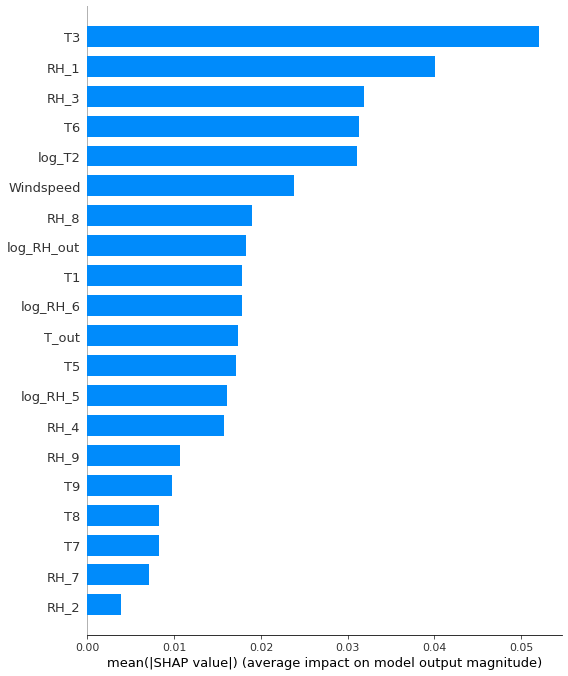

In [93]:
shap.summary_plot(shap_values,X_train[0:100], feature_names=X.columns, plot_type="bar")


#SHAP Summary Plot
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value of each instance. You can see that the feature is the most important feature, has a high Shapley value range. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

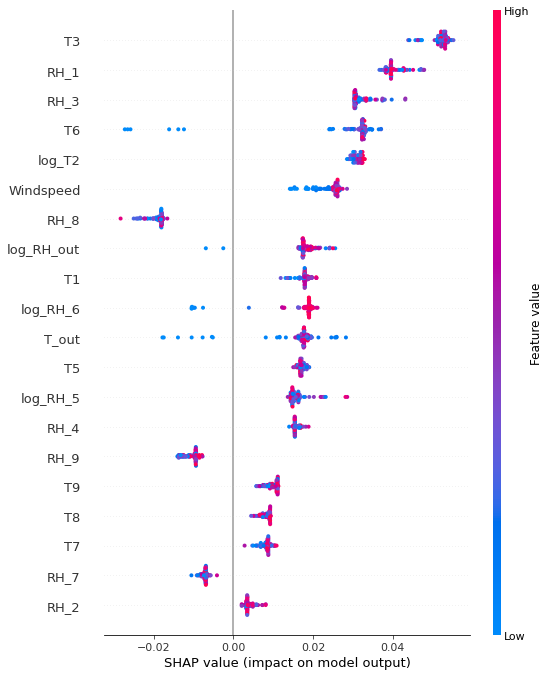

In [94]:
shap.summary_plot(shap_values,X_train[0:100], feature_names=X.columns)

#SHAP Dependence Plot

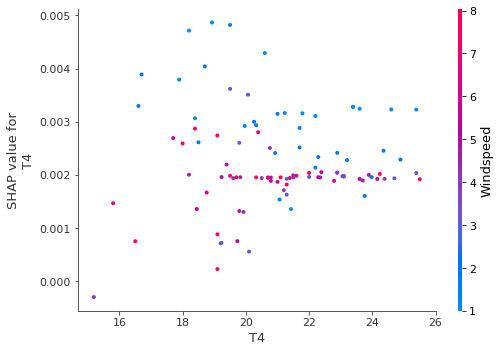

In [95]:
shap.dependence_plot(X.columns[5], shap_values,X_train[0:100], feature_names=X.columns)

#Conclusion

 1) In data visualization, we used log transformation to remove the skewness. And on removal of skewness it is observed that it follows normal distribution.
Log transformation was applied on RH_6, RH_5,RH_out and T2.

2) In feature selection, We performed four feature selection techniques:- Filter Method, Wrapper Method, Embedded Method and Burota. We got the best results from the burota method. After performing feature selection using burota some features were dropped - rv1,rv2,weekday, Visibility and month.


3) After training the dataset on twelve  models and evaluating on the five evaluation metrics, the ExtraTree Regressor model came out to be the best model with an R2 score of  .62 and RMSE of 61.40. Extra Trees Regressor, the features and splits are selected at random. Since splits are chosen at random for each feature in the ExtraTrees Regressor, it’s less computationally expensive than other tree based models.

4) We built a base model using ExtratreesRegressor and the scores for the different evaluation metrics are as follows R2 - 0.65, adjusted R2- 0.65, MAPE - 0.27, MAE - 27.29, RMSLE - 58.9.

5) Then we used log transformation, and used one hot encoding for the categorical variables, scaled the X_train, X_test and fit the Extratreesregressor. The improved scores of the different evaluation metrics are R2 - 0.75, adjusted R2- 0.75, MAPE - 0.08, MAE - 0.65, RMSLE - 0.13.

6) We used  Shapley Additive Explanation (SHAP Values) For interpretation of our model.After calculating the SHAP values we  plotted several analyses that will help us to understand the model.

7) According to best fit model , the 5 most and least important features
The top 3 important features are humidity attributes, which leads to the conclusion that humidity affects power consumption more than temperature. Windspeed is least important as the speed of wind doesn’t affect power consumption inside the house. So controlling humidity inside the house may lead to energy savings.
